In [3]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

MessageError: ignored

In [ ]:
# 의학데이터? -> 도메인 지식 필요

### 탐색적 데이터 분석(EDA : Exploratory Data Analysis)

In [ ]:
df.head()

age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0  75.0        0                       582  ...        0     4            1
1  55.0        0                      7861  ...        0     6            1
2  65.0        0                       146  ...        1     7            1
3  50.0        1                       111  ...        0     7            1
4  65.0        1                       160  ...        0     8            1

[5 rows x 13 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe() # mean-max : IQR

age     anaemia  ...        time  DEATH_EVENT
count  299.000000  299.000000  ...  299.000000    299.00000
mean    60.833893    0.431438  ...  130.260870      0.32107
std     11.894809    0.496107  ...   77.614208      0.46767
min     40.000000    0.000000  ...    4.000000      0.00000
25%     51.000000    0.000000  ...   73.000000      0.00000
50%     60.000000    0.000000  ...  115.000000      0.00000
75%     70.000000    1.000000  ...  203.000000      1.00000
max     95.000000    1.000000  ...  285.000000      1.00000

[8 rows x 13 columns]

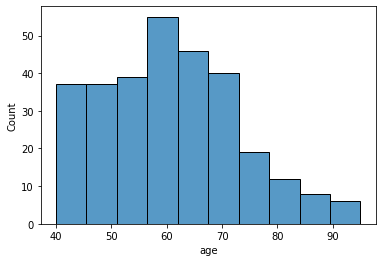

In [ ]:
import seaborn as sns
sns.histplot(x='age', data=df)

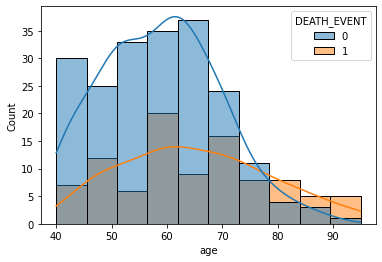

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True)
# sns.histplot(x='age', data=df, hue='DEATH_EVENT')

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

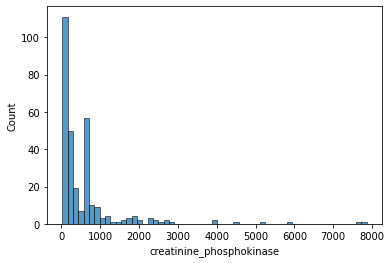

In [ ]:
# sns.histplot(x='creatinine_phosphokinase', data=df) # 뒷 부분의 강력한 독립변수를 찾아야 함 -> outlier 안지워도 되겠지? -> 완성도 높아짐
sns.histplot(data=df['creatinine_phosphokinase'])

In [ ]:
df['creatinine_phosphokinase'] < 3000

0       True
1      False
2       True
3       True
4       True
       ...  
294     True
295     True
296     True
297     True
298     True
Name: creatinine_phosphokinase, Length: 299, dtype: bool

In [ ]:
df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase']

0       582
2       146
3       111
4       160
5        47
       ... 
294      61
295    1820
296    2060
297    2413
298     196
Name: creatinine_phosphokinase, Length: 292, dtype: int64

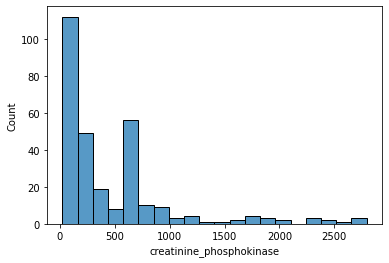

In [ ]:
# **** 중요
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])

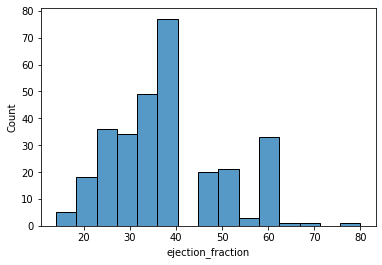

In [ ]:
sns.histplot(data=df['ejection_fraction']) # 빵꾸 - 통계적으로 전체적인? 파악 힘들다

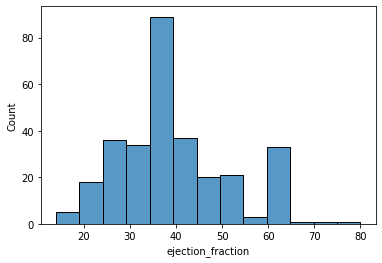

In [ ]:
sns.histplot(data=df['ejection_fraction'], bins=13) # sns 자체에서 알아서 bin 출력 조정해 줌

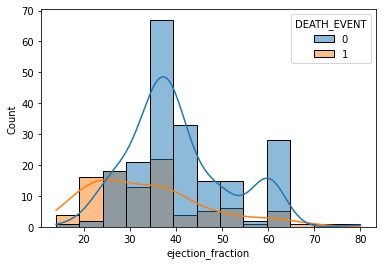

In [ ]:
sns.histplot(x='ejection_fraction', data=df, bins=13, hue='DEATH_EVENT', kde=True)
# 1(사망률) 예측 -> 아래 사망률이 너무 적어서 x 데이터 recall 의미가 낮음

In [ ]:
# '의료데이터'는 -> recall이 높아야 한
# 여러개를 보고 판단
# 2020년 1월... 의료데이터법..통과
# bio data science -> MRI/CT=>CV , 유럽?덴마크? 논문..

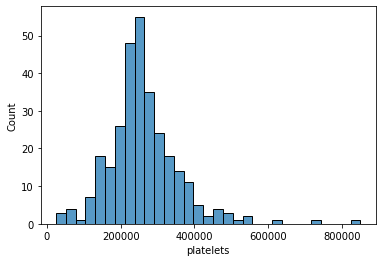

In [ ]:
sns.histplot(x='platelets', data=df)

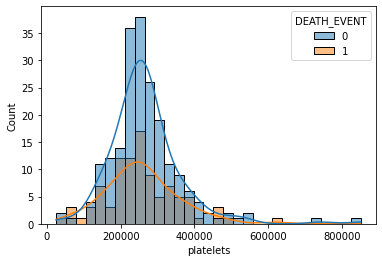

In [ ]:
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT', kde=True) # DEATH_EVENT hue를 넣어주는 이유 -> 생존여부와 사망여부의 확률이 얼마나 비슷한가?
# (위아래/막대크기비슷)연관이 있다 -> 좋지 않은 데이터.. 학습할 때 뺀다

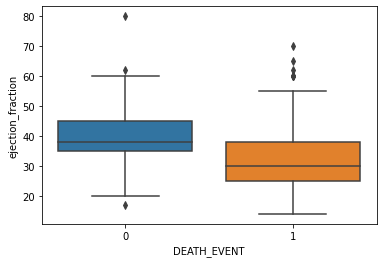

In [ ]:
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df) 
# DEATH_EVENT : 0, 1 # 종속/독립변수 비교 -> 인과관계
# insite - outlier 판단에 도움

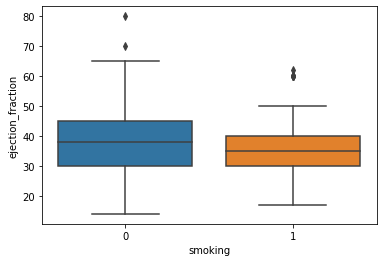

In [ ]:
sns.boxplot(x='smoking', y='ejection_fraction', data=df) # 독립/독립변수 -> 들 간에도 연관(상관관계)이 있지 않을까? 확인 

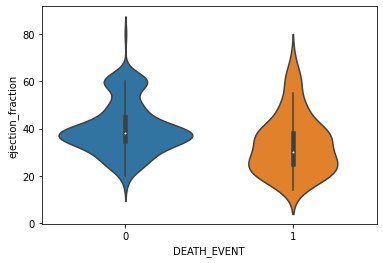

In [ ]:
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

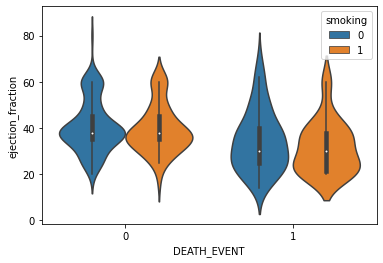

In [ ]:
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', hue='smoking', data=df)

## 전처리


In [ ]:
df.head()

age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0  75.0        0                       582  ...        0     4            1
1  55.0        0                      7861  ...        0     6            1
2  65.0        0                       146  ...        1     7            1
3  50.0        1                       111  ...        0     7            1
4  65.0        1                       160  ...        0     8            1

[5 rows x 13 columns]

In [ ]:
from sklearn.preprocessing import  StandardScaler

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# 수치형 -> scaling // 표준화 (정규분포에 가깝게)
X_num = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]
# 범주형
X_cat = df[['anaemia', 'diabetes','high_blood_pressure', 'sex', 'smoking']]

y = df['DEATH_EVENT'] # 값이 너무 잘 나오면 가끔 y값이 x값으로 들어갈 때가 있다고..

In [ ]:
scaler = StandardScaler()
scaler.fit(X_num)
# X_scaled

X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)

# 수치형(스케일링됨) + 범주형
X = pd.concat([X_scaled, X_cat], axis=1)

In [ ]:
X.head()

age  creatinine_phosphokinase  ...  sex  smoking
0  1.192945                  0.000166  ...    1        0
1 -0.491279                  7.514640  ...    1        0
2  0.350833                 -0.449939  ...    1        1
3 -0.912335                 -0.486071  ...    1        0
4  0.350833                 -0.435486  ...    0        0

[5 rows x 12 columns]

## 데이터 분리

In [ ]:
from sklearn.model_selection import  train_test_split # 자동으로 나눠줌 -> 여러가지 패키지들에서 지원하는 기능 tensorflow.. # 데이터 적으면 - k-fold?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
# 훈련

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 학습 평가

In [ ]:
from sklearn.metrics import classification_report
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        64
           1       0.76      0.62      0.68        26

    accuracy                           0.83        90
   macro avg       0.81      0.77      0.78        90
weighted avg       0.83      0.83      0.83        90



In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
# kaggle 상위권에서 대부분 사용한다 함
# 분류모형 -> 선을 그어 나눔
# 회귀모형 -> 선을 그어 예측

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        64
           1       0.90      0.73      0.81        26

    accuracy                           0.90        90
   macro avg       0.90      0.85      0.87        90
weighted avg       0.90      0.90      0.90        90



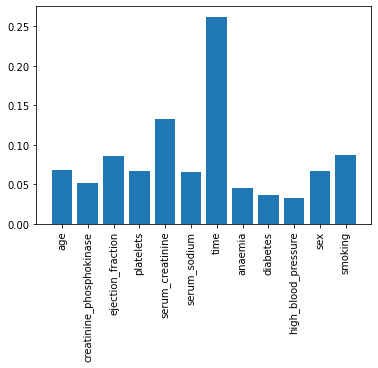

In [ ]:
import matplotlib.pyplot as plt

plt.bar(X.columns, model_xgb.feature_importances_) # y값에 비교해서 얼마나 중요도가 높은가 # time->결과값에 의해 영향을 받는다? -> 이런 데이터 주의
plt.xticks(rotation=90) # 90도 회전
plt.show()